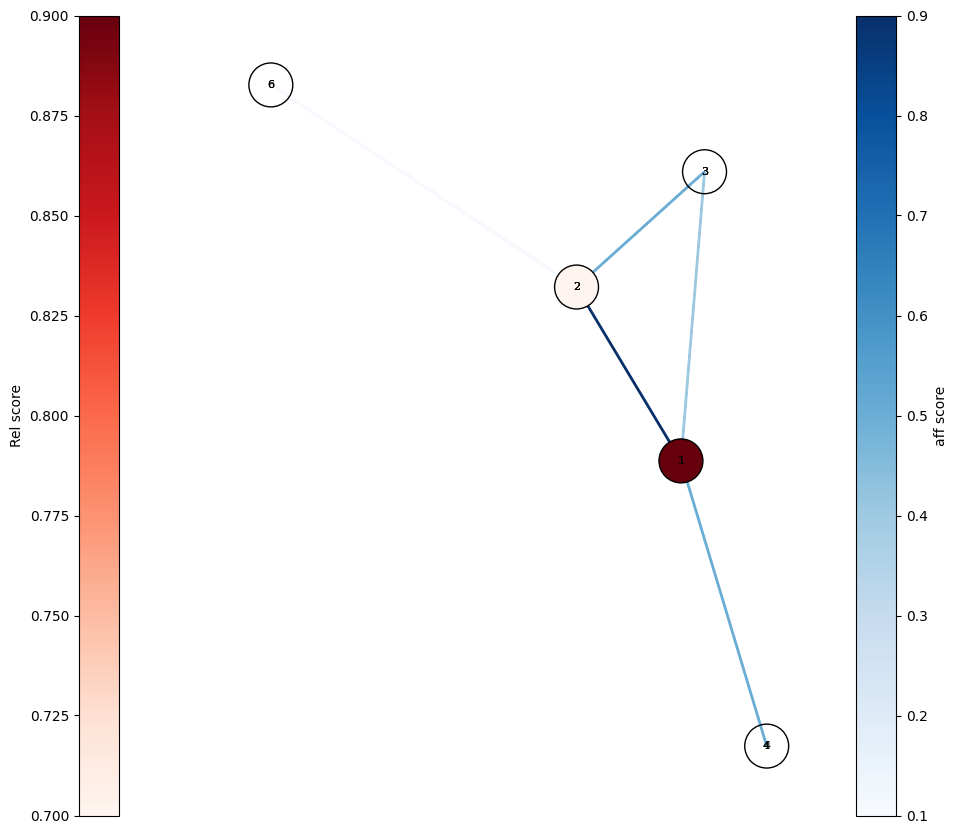

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

# Define your graph data (source nodes, neighbors, edge weights, node weights)
graph_data = {
    "1": {"nbh": ["2", "3", "4"], "aff_score": [0.1, 0.4, 0.5]},
    "2": {"nbh": ["3", "6", "1"], "aff_score": [0.5, 0.1, 0.9]}
}
node_weights = {"1": 0.9, "2": 0.7, "3": 1.5}



def plot_graph(graph_data, node_weights):
# Create a graph
    G = nx.Graph()

    # Add nodes and edges with weights
    for source, data in graph_data.items():
        source_node = int(source)
        neighbors = data["nbh"]
        edge_weights = data["aff_score"]

        # Add source node
        G.add_node(source_node)

        # Add node weight if available, otherwise default to 0
        G.nodes[source_node]["weight"] = node_weights.get(source, None)

        # Add edges and their weights
        for neighbor, weight in zip(neighbors, edge_weights):
            neighbor_node = int(neighbor)
            G.add_edge(source_node, neighbor_node, weight=weight)

    # Plot the graph
    plt.figure(figsize=(10, 8))  # Increase the size of the plot
    pos = nx.spring_layout(G,k=0.5)  # Positioning the nodes using the spring layout



    nodes_with_weight = [node for node in G.nodes() if "weight" in G.nodes[node] and G.nodes[node]["weight"] is not None]
    nodes_without_weight = [node for node in G.nodes() if "weight" not in G.nodes[node] or G.nodes[node]["weight"] is None]


    if nodes_with_weight:
        node_colors = [G.nodes[node]["weight"] for node in nodes_with_weight]
        norm = mcolors.Normalize(vmin=min(node_colors), vmax=max(node_colors))
        node_scalar_map = plt.cm.ScalarMappable(cmap=plt.cm.Reds, norm=norm)
        nx.draw(G, pos, nodelist=nodes_with_weight, with_labels=True, node_size=1000, node_color=node_colors, edgecolors='black', cmap=plt.cm.Reds, font_size=8,font_family='serif')

    nx.draw(G, pos, nodelist=nodes_without_weight, with_labels=True, node_size=1000, node_color='none', edgecolors='black', font_size=8, font_family='serif')


    node_labels = nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')

    # Edge color based on weight
    edge_colors = [d["weight"] for _, _, d in G.edges(data=True)]
    norm = mcolors.Normalize(vmin=min(edge_weights), vmax=max(edge_weights))
    edge_scalar_map = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=norm)
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors, edge_cmap=plt.cm.Blues, width=2)


    # Color bar for node weights
    node_cbar = plt.colorbar(node_scalar_map, label='Rel score', location='left', ax=plt.gca())
    node_cbar.ax.yaxis.set_label_position('left')  # Set position to left side

    # Color bar for edge weights
    edge_cbar = plt.colorbar(edge_scalar_map, label='aff score',location='right', ax=plt.gca())
    edge_cbar.ax.yaxis.set_label_position('right')  # Set position to right side


    # # Color bar for node weights
    # node_cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.Reds), label='Node Weights', location='left')

    # # Color bar for edge weights
    # edge_cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.Blues), label='Edge Weights', location='right')

    plt.axis('off')
    plt.show()
    #plt.savefig('plots/graphs/test.pdf', bbox_inches='tight')


plot_graph(graph_data, node_weights)


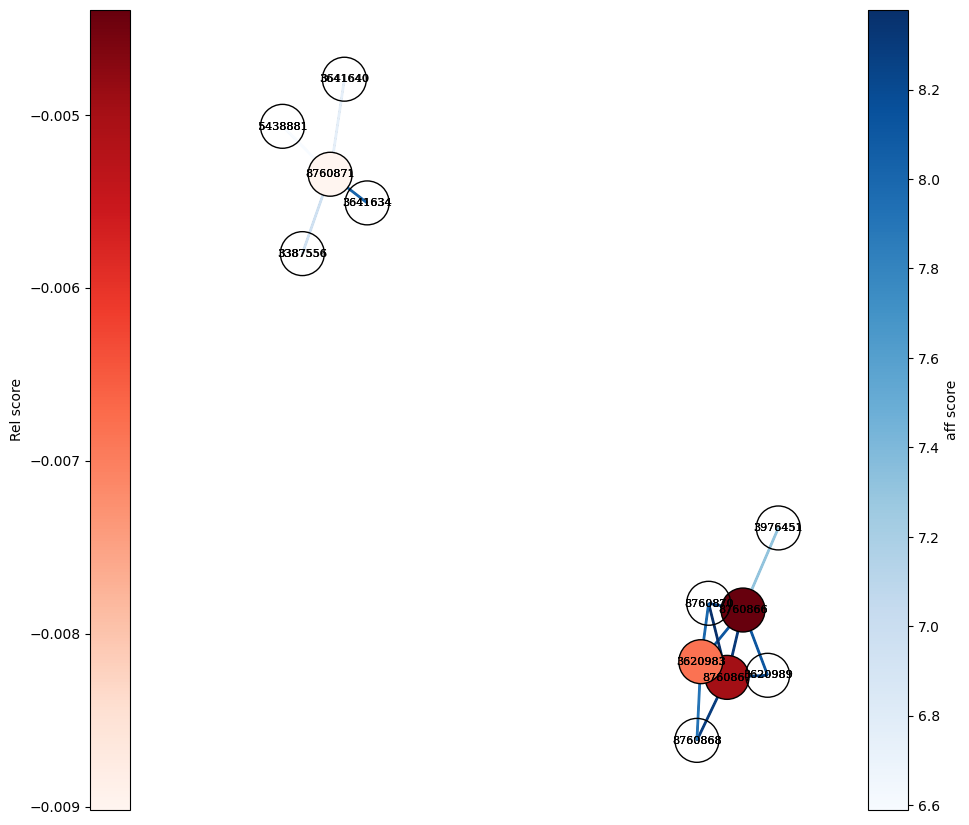

In [13]:
node_weights = {'8760866': -0.004392737057060003, '8760867': -0.004970693029463291, '3620983': -0.006817888002842665, '8760871': -0.009018993005156517} 
                                        
graph_data = {"8760866": {'nbh': [8760870, 3620989, 8760867, 3976451], 'aff_score': [8.674145698547363, 8.502452850341797, 8.760326385498047, 7.500721454620361]}, 
              '8760867': {'nbh': [8760870, 8760866, 3620989, 8760868], 'aff_score': [8.83434772491455, 8.747782707214355, 8.662209510803223, 8.71353816986084]},
                "3620983": {'nbh': [8760868, 8760867, 8760870, 8760866], 'aff_score': [8.24183464050293, 8.6295747756958, 8.35749340057373, 8.492663383483887]}, 
                '8760871': {'nbh': [3641634, 5438881, 3387556, 3641640], 'aff_score': [8.378214836120605, 6.589860439300537, 7.05048131942749, 6.79580020904541]}} 


plot_graph(graph_data, node_weights)
